In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Cкачать набор данных маркетинговых кампаний отсюда https://www.kaggle.com/davinwijaya/customer-retention <br>
Примечание: датасет есть в архиве материалов к 4 уроку**

In [16]:
df = pd.read_csv('HW_data.csv')
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


**Поле conversion - это целевая переменная, а offer - коммуникация. Переименовать поля (conversion -> target, offer -> treatment) и привести поле treatment к бинарному виду (1 или 0, т.е было какое-то предложение или нет) - значение No Offer означает отсутствие коммуникации, а все остальные - наличие.**

In [17]:
df.rename(columns={'conversion': 'target', 'offer': 'treatment'}, inplace=True)
df['treatment'] = df['treatment'].map(lambda x: 0 if x == 'No Offer' else 1)
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,1,0
1,6,329.08,1,1,Rural,1,Web,0,0
2,7,180.65,0,1,Surburban,1,Web,1,0
3,9,675.83,1,0,Rural,1,Web,1,0
4,2,45.34,1,0,Urban,0,Web,1,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,1,0
63996,5,38.91,0,1,Urban,1,Phone,1,0
63997,6,29.99,1,0,Urban,1,Phone,1,0
63998,1,552.94,1,0,Surburban,1,Multichannel,1,0


**Сделать feature engineering на ваше усмотрение (допускается свобода выбора методов)**

In [18]:
def FeatureGenerator(dframe_):
    dframe = dframe_.copy()
    pre_name = 'is_'
    
    col_names = ['channel', 'zip_code']
    
    for col in col_names:
        for el in dframe[col].unique():
            new_col_name = pre_name + el
            dframe[new_col_name] = 0
            dframe.loc[dframe[col] == el, new_col_name] = 1
            
    dframe['discount_bogo'] = 0.5
    dframe.loc[(dframe['used_discount'] == 0) & (dframe['used_bogo'] == 0), 'discount_bogo'] = 0
    dframe.loc[(dframe['used_discount'] == 1) & (dframe['used_bogo'] == 1), 'discount_bogo'] = 1
    
    return dframe

In [19]:
df_features = FeatureGenerator(df)
df_features

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target,is_Phone,is_Web,is_Multichannel,is_Surburban,is_Rural,is_Urban,discount_bogo
0,10,142.44,1,0,Surburban,0,Phone,1,0,1,0,0,1,0,0,0.5
1,6,329.08,1,1,Rural,1,Web,0,0,0,1,0,0,1,0,1.0
2,7,180.65,0,1,Surburban,1,Web,1,0,0,1,0,1,0,0,0.5
3,9,675.83,1,0,Rural,1,Web,1,0,0,1,0,0,1,0,0.5
4,2,45.34,1,0,Urban,0,Web,1,0,0,1,0,0,0,1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,1,0,0,1,0,0,0,1,0.5
63996,5,38.91,0,1,Urban,1,Phone,1,0,1,0,0,0,0,1,0.5
63997,6,29.99,1,0,Urban,1,Phone,1,0,1,0,0,0,0,1,0.5
63998,1,552.94,1,0,Surburban,1,Multichannel,1,0,0,0,1,1,0,0,0.5


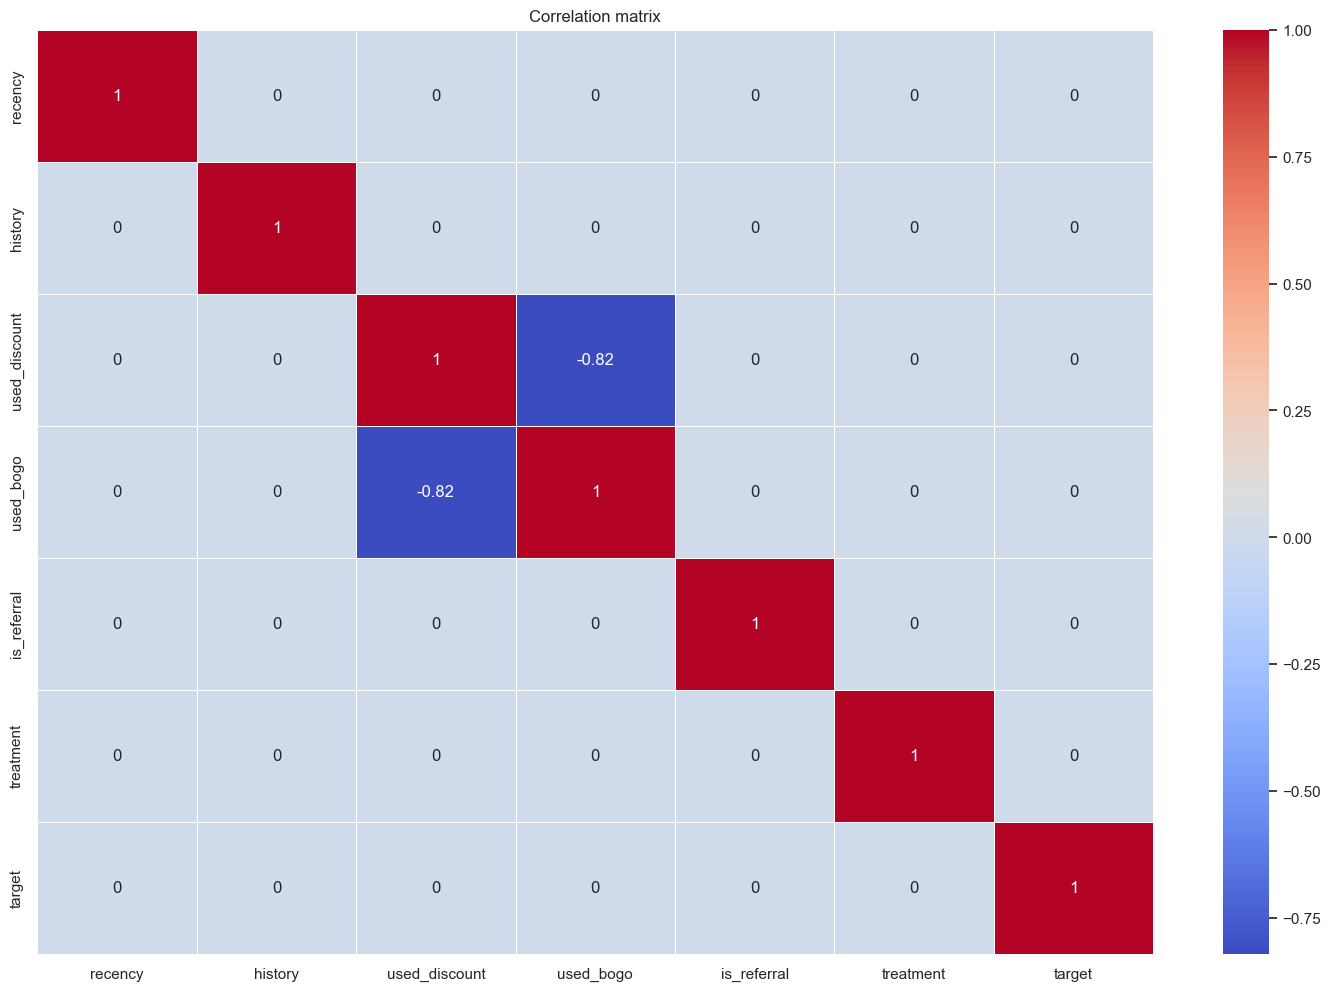

In [20]:
plt.figure(figsize=(18, 12))

sns.set(font_scale=1)

corr_X = df.corr()
corr_X = np.round(corr_X, 2)
corr_X[np.abs(corr_X) < 0.3] = 0

sns.heatmap(corr_X, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**Сделать разбиение набора данных не тренировочную и тестовую выборки**

In [23]:
indices_train = df.index
indices_test = df.index
indices_learn, indices_valid = train_test_split(df.index, test_size=0.3, random_state=123)

In [24]:
X_train = df_features.loc[indices_learn, :]
y_train = df.loc[indices_learn, 'target']
treat_train = df.loc[indices_learn, 'treatment']

X_val = df_features.loc[indices_valid, :]
y_val = df.loc[indices_valid, 'target']
treat_val =  df.loc[indices_valid, 'treatment']

X_train_full = df.loc[indices_train, :]
y_train_full = df.loc[:, 'target']
treat_train_full = df.loc[:, 'treatment']

X_test = df_features.loc[indices_test, :]

cat_features = ['zip_code', 'channels']

models_results = {
    'approach': [],
    'uplift@10%': [],
    'uplift@20%': []
    }

In [26]:
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel
from catboost import CatBoostClassifier


sm = SoloModel(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_sm = sm.predict(X_val)

sm_score = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('SoloModel')
models_results['uplift@10%'].append(sm_score)

# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

ModuleNotFoundError: No module named 'sklift'

In [ ]:
sm_fi = pd.DataFrame({
    'feature_name': sm.estimator.feature_names_,
    'feature_score': sm.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

In [ ]:
from sklift.models import ClassTransformation


ct = ClassTransformation(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
ct = ct.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_ct = ct.predict(X_val)

ct_score = uplift_at_k(y_true=y_val, uplift=uplift_ct, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('ClassTransformation')
models_results['uplift@10%'].append(ct_score)

In [ ]:
from sklift.models import TwoModels


tm = TwoModels(
    estimator_trmnt=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    method='vanilla'
)
tm = tm.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params={'cat_features': cat_features}, 
    estimator_ctrl_fit_params={'cat_features': cat_features}
)

uplift_tm = tm.predict(X_val)

tm_score = uplift_at_k(y_true=y_val, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('TwoModels')
models_results['uplift@10%'].append(tm_score)

plot_uplift_preds(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_);